In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import string
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
from sklearn import tree
import time


# Project Idea
### What features are the most significant to classify popularity for the most famous,highly-streamed songs (ranked by popularity) on Spotify?

# Project Pitch:
What makes the next biggest song a hit? There have been countless observations and trends given over the years by researchers and reporters alike for the changing of music, such as popular songs in the past 30 years decreasing in the number of male singers and happy songs, followed by an increase in sad, relaxed, and danceable songs to reach the Top 100 list from the Official Charts Company in the UK (Interiano et al, 2018). According to ratings from pieces from the US Billboard Top 100, aggressive percussive backing tracks and bright-toned music have declined over the past 10 years, while energetic guitar-based music has increased over the past 20 years and continues to increase (Mauch et al, 2015). Each of these aspects of music over the years have been fundamental to distinguishing which genre different songs fit into, but different genres of music evolve and morph into different subgenres, fitting in with the times and contrasting with them. But what trends might we see in popularity if we remove songs and pieces from their respective genres, instead grouping them based on their danceability and tone? What underlying features can we identify as the most impactful in terms of popularity for the most popular music streaming app on the market, Spotify?

# Prior Research: 

Music has been studied by many different sources and fields of study over the past 50 years, with people asking after the rise of new trends and musicians what makes them so popular. Each of these research papers contributed to by Mauch (2015), Interiano (2018), and their colleagues investigate the patterns in changes of tone and energy in different pieces, as well as certain aspects of the pieces that sold the most copies. The paper from Mauch on song trends in the US is majorly based on audio features interpreted from lyrics, pitch, and rhythm, rather than scores given by fans on a website, like for the paper from Interiano. Mauch’s report also includes linear trend and clustering models similar to the models we plan to use, but without the machine learning implements we plan to employ. Interiano’s paper applies Linear Regression and Random Forest classification models to determine the relationships between different features and popularity. 
Additionally, there have been many different research documents focused on predicting the popularity of songs based on data collected by Spotify. To name a few research projects based on this data on Kaggle, there is the “Popularity Prediction XGBoost & Regression Analysis” notebook from Hossein Faridnasr, which evaluates the XGBoost prediction model for its effectivity on predicting the popularity of songs hidden in the test set. However, similar to other Notebooks present for this specific dataset, there isn’t a large amount of correlation between each of the features present in correlation matrices for the data, except the following feature pairings: acoustics, energy, and loudness; danceability and valance (Faridnasr, 2023). This indicates that reducing the dimensionality of the data, if not possible with Principal Component Analysis, K-means clustering, or another form of unsupervised learning to narrow down the features, may require some clever feature engineering to evaluate relationships in song popularity.
Our current research into past projects of Spotify song popularity is sparse, but we plan to expand this knowledge base as we continue inspecting the data and exploring different possible models we can use to collect our results. 


# About the data:
This is a dataset of Spotify tracks over a range of 125 different genres. Each track has some audio features associated with the song, such as its duration in milliseconds, tempo in beats-per-minute, and liveness from 0 to 1. More features are listed below.

**Feature Description, Data Collection, Cleaning, and Exploration Plan:**
`track_id:` The Spotify ID for the track (song on an album).
`artists:` The artists' names who performed the track. If there is more than one artist, they are separated by a “;” symbol.
`album_name:` The album name in which the track appears.
`track_name:` The name of the track.
`popularity:` A track's popularity is between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, for the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated.independently. Artist and album popularity is derived mathematically from track popularity.
`duration_ms:` The track length in milliseconds.
`explicit:` Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown).
`danceability:` Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is the least danceable and 1.0 is the most danceable.
`energy:` Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
`key:` The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
`loudness:` The overall loudness of a track in decibels (dB).
`mode:` Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
`speechiness:` Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
`acousticness:` A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
`instrumentalness:` Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentals value is to 1.0, the greater the likelihood the track contains no vocal content.
`liveness:` Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.
`valence:` A measure from 0.0 to 1.0 describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
`tempo:` The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
`time_signature:` An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
`track_genre:` The genre in which the track belongs.

Not all of these features are present in both datasets. The features above are those present in the first dataset "song_data.csv".

The second dataset contains fewer overall features, 

# Data Cleaning

**Why?** 
We consider a song is popular if it's popularity determined by the number of time it was played is greater than 75, also if we want we can increase the number of popularity for better accuracy.

We have way too many data so we were not worried about not having enough data to work with so remove all the row that had enpty date. 

In [2]:
# Load data and drop unnecessary columns and rows with null values
data = pd.read_csv('data/song_data.csv').drop(columns=['track_id', 'key']).dropna(how='any')

# Remove duplicates based on track name
data = data.drop_duplicates(subset=['track_name'])

# Convert milliseconds to seconds
data['duration_s'] = data['duration_ms'] / 1000
#data.drop(columns=['milliseconds'], inplace=True) # drops the old column

# Filter data with "popularity" greater than 75
data = data[data['popularity'] > 75]


# More cleaning 


In [17]:
'''using the average we can make model like linear regression, decision tree, or forest'''

cleared_data = pd.read_csv('data/song_data.csv').drop(columns=['track_id', 'key']).dropna(how='any')

# Assuming 'popularity' column contains numerical values
cleared_data['popularity'] = cleared_data['popularity'].apply(lambda x: 1 if x > 50 else 0)

# Convert True to 1 and False to 0 in the "popularity" column
cleared_data['explicit'] = cleared_data['explicit'].astype(int)

# Remove duplicates based on track name
cleared_data = cleared_data.drop_duplicates(subset=['track_name'])

# Convert milliseconds to seconds
cleared_data['duration_s'] = cleared_data['duration_ms'] / 1000

# List of columns you want to keep
columns_data = ['popularity', 'duration_s', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
columns_targets = ['duration_s', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Filtering columns

cleared_data = cleared_data[columns_data]


# Data understanding

We made graphs to look at diffrent relationship between the date for better understanding. 

## SVM Classifier Model w/ Linear Kernel
This model applies the Support Vector Classifier, which gives us weights of support vectors for the strongest predictors of popularity in the dataset. 

## KKN Modal 

In [15]:
# Problem: Popularity is mixing into this dataset, making the model train incorrectly.

long_data = pd.melt(cleared_data, id_vars=['popularity'], var_name='feature', value_name='value')

# Calculate the mean for each feature and popularity
means = long_data.groupby(['feature', 'popularity'])['value'].mean().reset_index()

# Reshape the data back to wide format
wide_means = means.pivot(index='feature', columns='popularity', values='value')

# Print the result
print(wide_means)

# Select numeric columns
numeric_cols = cleared_data.select_dtypes(include='number')

# Min-max normalization
pop_norm = (numeric_cols - numeric_cols.min()) / (numeric_cols.max() - numeric_cols.min())

# Standardization
pop_stan = (numeric_cols - numeric_cols.mean()) / numeric_cols.std()

# Create knn_results DataFrame
knn_results = pd.DataFrame({
    'k': range(1, 6),
    'pop_norm': [-1] * 5,
    'pop_stan': [-1] * 5
})

# Displaying the knn_results DataFrame
#print(knn_results)

# Convert 'pop_norm' and 'pop_stan' columns to float64
knn_results['pop_norm'] = knn_results['pop_norm'].astype(float)
knn_results['pop_stan'] = knn_results['pop_stan'].astype(float)

# Fit KNN Algorithm for normalized data
for i in range(len(knn_results)):
    knn = KNeighborsClassifier(n_neighbors=knn_results.loc[i, 'k'])
    loop_knn = cross_val_predict(knn, pop_norm, cleared_data['popularity'], cv=5)
    loop_norm_cm = confusion_matrix(loop_knn, cleared_data['popularity'])
    accuracy = round(accuracy_score(loop_knn, cleared_data['popularity']), 2)
    print(f"Accuracy for k={knn_results.loc[i, 'k']} with normalized data: {accuracy}")  # Debugging print
    knn_results.loc[i, 'pop_norm'] = accuracy

    # Fit KNN Algorithm for standardized data
    knn = KNeighborsClassifier(n_neighbors=knn_results.loc[i, 'k'])
    loop_knn2 = cross_val_predict(knn, pop_stan, cleared_data['popularity'], cv=5)
    accuracy2 = round(accuracy_score(loop_knn2, cleared_data['popularity']), 2)
    print(f"Accuracy for k={knn_results.loc[i, 'k']} with standardized data: {accuracy2}")  # Debugging print
    knn_results.loc[i, 'pop_stan'] = accuracy2

# Displaying the first 10 rows of knn_results DataFrame
# print(knn_results.head(10))

# long_knn_results = knn_results.melt(id_vars='k', var_name='rescale_method', value_name='accuracy')
#
# # Create the plot
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=long_knn_results, x='k', y='accuracy', hue='rescale_method')
#
# # Set labels and title
# plt.xlabel('Choice of K')
# plt.ylabel('Accuracy')
# plt.title('KNN Algorithm Performance')
# plt.legend(title='Rescale Method', labels=['Normalized', 'Standardized'])
#
# # Set scale for x-axis and y-axis
# plt.xticks(range(1, 6))
# plt.yticks(np.arange(0.95, 1.0, 0.01), labels=[f'{i:.2f}%' for i in np.arange(0.95, 1.0, 0.01)])
#
# # Adjust legend position
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#
# # Show plot
# plt.grid(True)
# plt.show()

long_knn_results = knn_results.melt(id_vars='k', var_name='rescale_method', value_name='accuracy')

# Select the rows with the maximum accuracy for each rescale method
max_accuracy_rows = long_knn_results.loc[long_knn_results.groupby('rescale_method')['accuracy'].idxmax()]

print(max_accuracy_rows)

# Ensure 'popularity' is included in pop_norm
pop_norm['popularity'] = cleared_data['popularity']

# Splitting data into features (X) and target (y)
X = pop_norm.drop(columns=['popularity'])  # Exclude 'popularity' from features
y = pop_norm['popularity']  # Use 'popularity' as the target column

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=4)

# Fitting the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predicting on the test data
y_pred = knn_classifier.predict(X_test)

# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


KeyError: "The following 'id_vars' are not present in the DataFrame: ['popularity']"

## Decision Tree Classifier Model

Accuracy: 0.6902594756147262
Pruned Accuracy: 0.6902594756147262
Best value of cp: 0.0


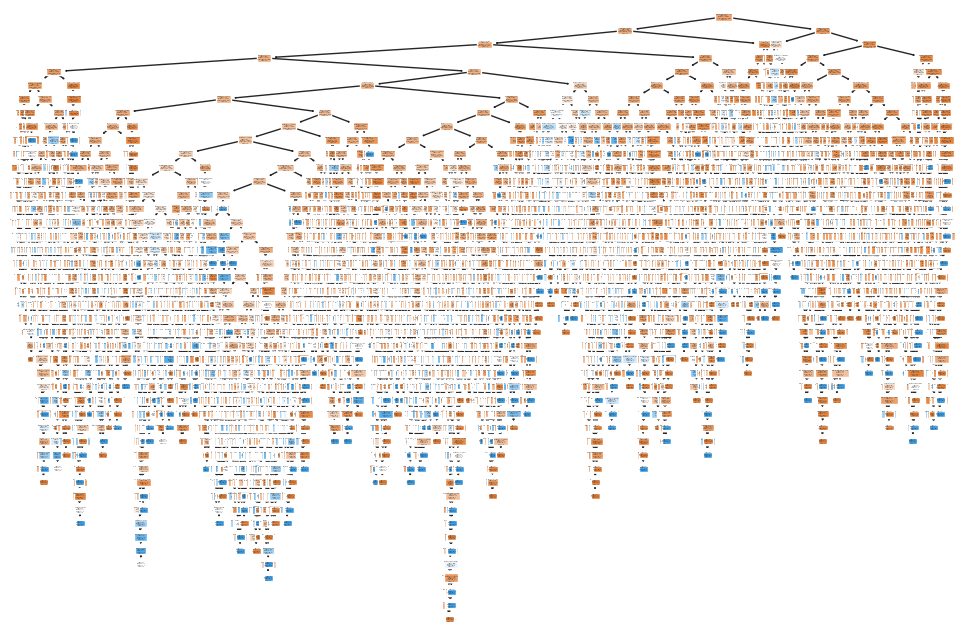

In [18]:
import numpy as np

np.random.seed(3870)

# Extracting features and target variable
X = cleared_data[columns_targets]
Y = cleared_data['popularity']

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=3870)

# Initialize the classifier
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_split=2, min_samples_leaf=1,
                                  ccp_alpha=0.0, random_state=3870)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing data
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate the cost complexity pruning path
ccp_path = clf.cost_complexity_pruning_path(X_train, y_train)

# Use the ccp_path to find the best value of cp to use to prune the full tree
best_cp_index = np.argmin(ccp_path['ccp_alphas'])
best_cp = ccp_path['ccp_alphas'][best_cp_index]

# Use the best value of cp to prune the full tree
pruned_clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_split=2,
                                         min_samples_leaf=1,
                                         ccp_alpha=best_cp, random_state=3870)
pruned_clf.fit(X_train, y_train)

# Evaluate the pruned classifier on the testing data
pruned_accuracy = pruned_clf.score(X_test, y_test)
print("Pruned Accuracy:", pruned_accuracy)

# Print the best value of cp
print("Best value of cp:", best_cp)

# Prune the tree
popularity_prune = tree.DecisionTreeClassifier(ccp_alpha=best_cp)
popularity_prune.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(12, 8))
tree.plot_tree(popularity_prune, filled=True, feature_names=X_train.columns,
               class_names=popularity_prune.classes_.astype(str))
plt.show()